# Case Study: Kids First

The Kids First Data Resource Center [https://doi.org/10.1093/neuonc/noaa222.200] tracks samples from pediatric research, including childhood cancers and structural birth defects. A single study with 1765 patients, 2281 specimens, 664 Observations and 38394 DocumentReferences are included.  The DocumentReference url field contains DRS url values.


In [1]:
import sys
# add git repo to our path (TODO - eliminate this step if we create a fhir-workshop package)
sys.path.append('./fhir-workshop')


In [2]:
from fhir_workshop.graph import load_graph, draw_graph, summarize_graph, find_by_resource_type, find_nearest
import fhir_workshop.manifests as manifests
import os
import pandas as pd 
from flatten_json import flatten



## Load the data


> In lieu of accessing a 'live' fhir service, we've pre-fetched some data


> The `load_graph` function loads the file paths into fhir resources and creates linkages between them, effectively simulating links the fhir server would normally provide
 

In [3]:
graph = load_graph('kf', manifests.kf_file_paths(), expected_resource_count=44000)
'loaded'

'loaded'

### Draw a summary graph

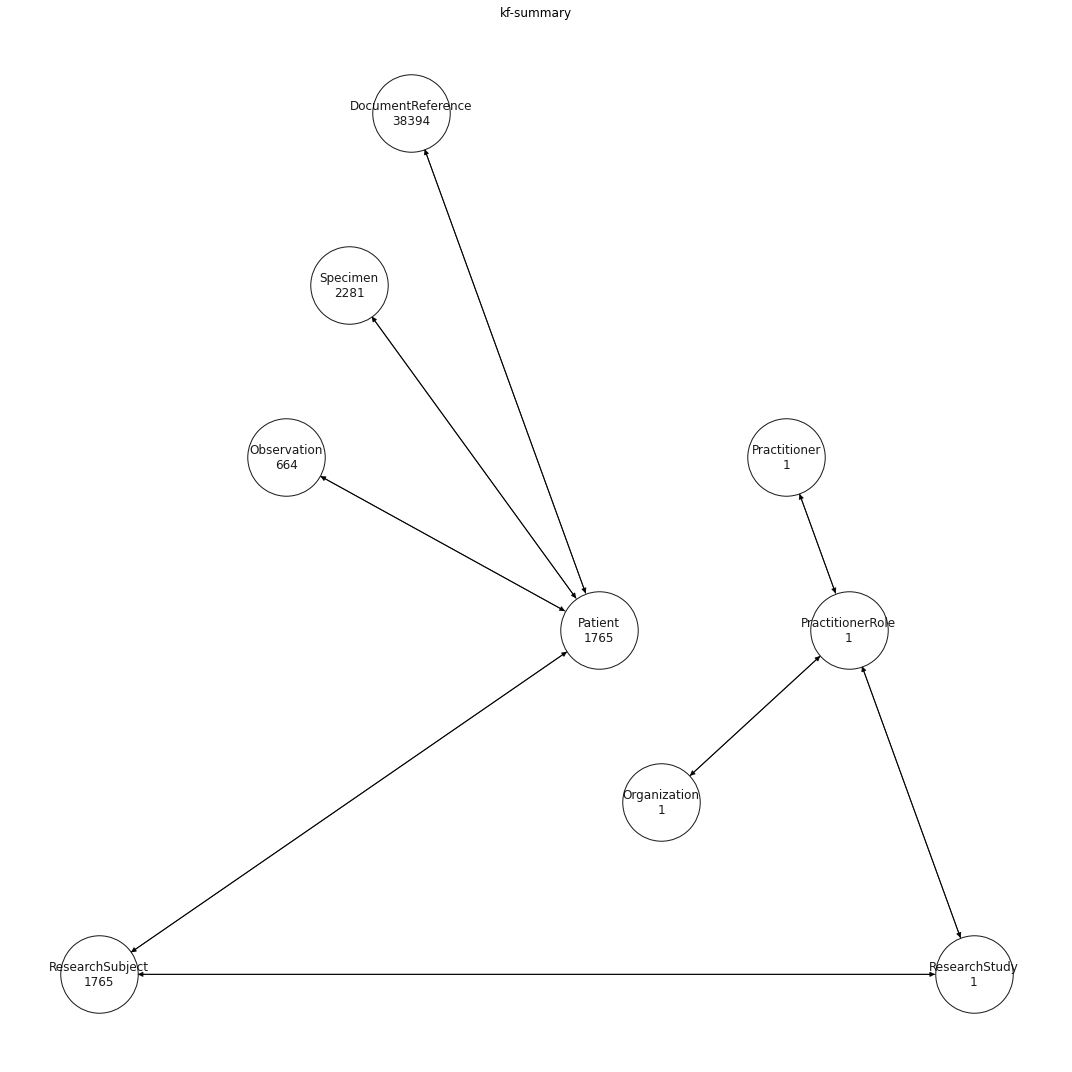

In [4]:
summary_graph = summarize_graph(graph)
path = os.path.join('/tmp/', 'kf-summary.png')
draw_graph(summary_graph, path=path)

### Retrieve all Patients

In [5]:
# "retrieve" the patients
patients = find_by_resource_type(graph, 'Patient')
# count the tuples that returned
assert len(patients) == 1765, "should have 1765 patients"
# get the FHIR resource
patients = [dict_['resource'] for id_, dict_ in patients]


### Show details

In [6]:
pd.DataFrame([flatten(patient.as_json()) for patient in patients] )

,id,meta_versionId,meta_lastUpdated,meta_source,meta_profile_0,meta_tag_0_code,extension_0_extension_0_url,extension_0_extension_0_valueString,extension_0_extension_1_url,extension_0_extension_1_valueCoding_system,...,extension_1_extension_1_valueCoding_code,extension_1_extension_1_valueCoding_display,extension_1_url,identifier_0_value,identifier_1_system,identifier_1_value,identifier_2_system,identifier_2_value,gender,resourceType
0,96506,2,2021-11-16T09:46:28.562+00:00,#av8jlyuHYC7yee4G,http://hl7.org/fhir/StructureDefinition/Patient,SD_DYPMEHHF,text,Asian,ombCategory,urn:oid:2.16.840.1.113883.6.238,...,2186-5,Not Hispanic or Latino,http://hl7.org/fhir/us/core/StructureDefinitio...,GMKF-30-PATWED03,https://kf-api-dataservice.kidsfirstdrc.org/pa...,PT_K59VNJ70,urn:kids-first:unique-string,Patient-SD_DYPMEHHF-PT_K59VNJ70,male,Patient
1,96509,2,2021-11-16T09:46:28.525+00:00,#crBEbGrmJvDslgDs,http://hl7.org/fhir/StructureDefinition/Patient,SD_DYPMEHHF,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,GMKF-30-PATWEJ13,https://kf-api-dataservice.kidsfirstdrc.org/pa...,PT_Q3J9BZMY,urn:kids-first:unique-string,Patient-SD_DYPMEHHF-PT_Q3J9BZMY,female,Patient
2,96514,2,2021-11-16T09:46:28.695+00:00,#4QEw4BGyZYUAGRkF,http://hl7.org/fhir/StructureDefinition/Patient,SD_DYPMEHHF,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,GMKF-30-PAUCNL13,https://kf-api-dataservice.kidsfirstdrc.org/pa...,PT_FYFTZSAV,urn:kids-first:unique-string,Patient-SD_DYPMEHHF-PT_FYFTZSAV,female,Patient
3,96501,2,2021-11-16T09:46:28.693+00:00,#sdMvR8aWIe6xpieh,http://hl7.org/fhir/StructureDefinition/Patient,SD_DYPMEHHF,text,White,ombCategory,urn:oid:2.16.840.1.113883.6.238,...,2186-5,Not Hispanic or Latino,http://hl7.org/fhir/us/core/StructureDefinitio...,GMKF-30-PATGLU03,https://kf-api-dataservice.kidsfirstdrc.org/pa...,PT_M5EFHVEJ,urn:kids-first:unique-string,Patient-SD_DYPMEHHF-PT_M5EFHVEJ,male,Patient
4,96541,2,2021-11-16T09:46:28.825+00:00,#Oo8qYyBuXg6tPoA3,http://hl7.org/fhir/StructureDefinition/Patient,SD_DYPMEHHF,text,Reported Unknown,ombCategory,http://terminology.hl7.org/CodeSystem/v3-NullF...,...,NaN,NaN,http://hl7.org/fhir/us/core/StructureDefinitio...,GMKF-30-PAULBY03,https://kf-api-dataservice.kidsfirstdrc.org/pa...,PT_BQCKFXJJ,urn:kids-first:unique-string,Patient-SD_DYPMEHHF-PT_BQCKFXJJ,female,Patient
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1760,98231,2,2021-11-16T09:47:16.337+00:00,#0l0B7zS0Z1tT3gQG,http://hl7.org/fhir/StructureDefinition/Patient,SD_DYPMEHHF,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,GMKF-30-PASREY06,https://kf-api-dataservice.kidsfirstdrc.org/pa...,PT_MEY13GCF,urn:kids-first:unique-string,Patient-SD_DYPMEHHF-PT_MEY13GCF,male,Patient
1761,98236,2,2021-11-16T09:47:16.508+00:00,#bqkMdBD3HXCEAryx,http://hl7.org/fhir/StructureDefinition/Patient,SD_DYPMEHHF,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,GMKF-30-PASHKL06,https://kf-api-dataservice.kidsfirstdrc.org/pa...,PT_9MPZG2XQ,urn:kids-first:unique-string,Patient-SD_DYPMEHHF-PT_9MPZG2XQ,male,Patient
1762,98253,2,2021-11-16T09:47:16.768+00:00,#uUtrFmjOBvA2sLIX,http://hl7.org/fhir/StructureDefinition/Patient,SD_DYPMEHHF,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,GMKF-30-PASTGD13,https://kf-api-dataservice.kidsfirstdrc.org/pa...,PT_TCCQ7E6A,urn:kids-first:unique-string,Patient-SD_DYPMEHHF-PT_TCCQ7E6A,female,Patient
1763,98263,2,2021-11-16T09:47:16.984+00:00,#SMoBeA8fhniVhvWd,http://hl7.org/fhir/StructureDefinition/Patient,SD_DYPMEHHF,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,GMKF-30-PASTVV06,https://kf-api-dataservice.kidsfirstdrc.org/pa...,PT_X55TEQMC,urn:kids-first:unique-string,Patient-SD_DYPMEHHF-PT_X55TEQMC,male,Patient


### Show simplified details

> 1/3 the number of columns

In [11]:
pd.DataFrame([flatten(patient.as_simplified_json()[0]) for patient in patients] ).fillna('')

,id,meta_versionId,meta_lastUpdated,meta_source,meta_profile,meta_tag_,identifier_,identifier_https://kf-api-dataservice.kidsfirstdrc.org/participants/,identifier_urn:kids-first:unique-string,gender,extension_us-core-race,extension_us-core-ethnicity
0,97729,2,2021-11-16T09:47:03.262000+00:00,#F6oafxGhYimGnGHx,http://hl7.org/fhir/StructureDefinition/Patient,SD_DYPMEHHF,GMKF-30-PAUJTY13,PT_T2M5HBGN,Patient-SD_DYPMEHHF-PT_T2M5HBGN,female,,
1,96799,2,2021-11-16T09:46:36.924000+00:00,#TftMG90MthYRN5Z3,http://hl7.org/fhir/StructureDefinition/Patient,SD_DYPMEHHF,GMKF-30-PAUYPL13,PT_TA6Q2MAJ,Patient-SD_DYPMEHHF-PT_TA6Q2MAJ,female,,
2,98133,2,2021-11-16T09:47:13.666000+00:00,#9L3u0gHxA7OoAlkj,http://hl7.org/fhir/StructureDefinition/Patient,SD_DYPMEHHF,GMKF-30-PATRPY06,PT_7SVWW17R,Patient-SD_DYPMEHHF-PT_7SVWW17R,male,,
3,97223,2,2021-11-16T09:46:48.379000+00:00,#EnYDw4MXSsGK3rgH,http://hl7.org/fhir/StructureDefinition/Patient,SD_DYPMEHHF,GMKF-30-PAVNVT03,PT_JH678RKR,Patient-SD_DYPMEHHF-PT_JH678RKR,female,White|2106-3,Not Hispanic or Latino|2186-5
4,97181,2,2021-11-16T09:46:47.009000+00:00,#kqO2pdjveVJF0RLm,http://hl7.org/fhir/StructureDefinition/Patient,SD_DYPMEHHF,GMKF-30-PATXTF03,PT_JYRSHSWJ,Patient-SD_DYPMEHHF-PT_JYRSHSWJ,male,White|2106-3,Not Hispanic or Latino|2186-5
...,...,...,...,...,...,...,...,...,...,...,...,...
1689,97972,2,2021-11-16T09:47:09.364000+00:00,#2RCxpGoLKyaklJ3J,http://hl7.org/fhir/StructureDefinition/Patient,SD_DYPMEHHF,GMKF-30-PASXVY06,PT_QBRMD6RE,Patient-SD_DYPMEHHF-PT_QBRMD6RE,male,,
1690,97971,2,2021-11-16T09:47:08.260000+00:00,#QVU2FPB2L6KYak0Y,http://hl7.org/fhir/StructureDefinition/Patient,SD_DYPMEHHF,GMKF-30-PASFHI13,PT_M4VMW1TC,Patient-SD_DYPMEHHF-PT_M4VMW1TC,female,,
1691,97717,2,2021-11-16T09:47:02.426000+00:00,#qT8bbLoT1M0qxgaY,http://hl7.org/fhir/StructureDefinition/Patient,SD_DYPMEHHF,GMKF-30-PATBHL03,PT_82D32MJ7,Patient-SD_DYPMEHHF-PT_82D32MJ7,male,White|2106-3,Not Hispanic or Latino|2186-5
1692,96709,2,2021-11-16T09:46:33.728000+00:00,#1wK6ptn0wcSl3WfB,http://hl7.org/fhir/StructureDefinition/Patient,SD_DYPMEHHF,GMKF-30-PASUEI06,PT_N454NWDP,Patient-SD_DYPMEHHF-PT_N454NWDP,male,,


## Navigate using FHIR references

In [12]:
document_references = [dict_['resource'] for id_, dict_ in find_by_resource_type(graph, 'DocumentReference')]
patients = set([graph.nodes.get(document_reference.subject.reference)['resource'] for document_reference in document_references])
f"document_references: {len(document_references)} patients: {len(patients)}"

'document_references: 38394 patients: 1694'

In [13]:

pd.DataFrame([
    {
        **{
            'subject': d.subject.reference,
            'type': document_references[0].type.text,
            'url': d.content[0].attachment.url,
        }
        
    }
    for d in document_references ] 
)

,subject,type,url
0,Patient/96503,gVCF,drs://data.kidsfirstdrc.org/5ce9f518-542a-4a18...
1,Patient/96559,gVCF,drs://data.kidsfirstdrc.org/b18f6d1c-eb0e-42d9...
2,Patient/96559,gVCF,drs://data.kidsfirstdrc.org/364df8f3-03d5-4dd4...
3,Patient/96559,gVCF,drs://data.kidsfirstdrc.org/15fbe09e-957c-4e89...
4,Patient/96559,gVCF,drs://data.kidsfirstdrc.org/bace002e-92bc-46e7...
...,...,...,...
38389,Patient/98248,gVCF,drs://data.kidsfirstdrc.org/0bc3e7bf-7377-4166...
38390,Patient/98248,gVCF,drs://data.kidsfirstdrc.org/1589c35f-c3d7-4884...
38391,Patient/98248,gVCF,drs://data.kidsfirstdrc.org/a15090f8-5064-4e6a...
38392,Patient/98248,gVCF,drs://data.kidsfirstdrc.org/598066c0-afe5-4f5e...


In [15]:

observations = [dict_['resource'] for id_, dict_ in find_by_resource_type(graph, 'Observation')]

records = []

for o in observations:
    attributes = {
            'subject': o.subject.reference if o.subject else None,
            'specimen': o.specimen.reference if o.specimen else None,
            'code': o.code.text if o.code.text else o.code.coding[0].display,
            'valueQuantity': o.valueQuantity.value if o.valueQuantity else None,
            'valueQuantity_unit': o.valueQuantity.unit if o.valueQuantity else None,
            'valueCodeableConcept': o.valueCodeableConcept.coding[0].display if o.valueCodeableConcept else None
        }
    components = {}
    if o.component:
        components = {
            c.code.coding[0].display if c.code.coding[0].display else c.code.coding[0].code:
            c.valueCodeableConcept.coding[0].display if c.valueCodeableConcept.coding else c.valueCodeableConcept.text
            for c in o.component if c.valueCodeableConcept
        }        
    records.append({**attributes, **components})

pd.DataFrame(records).fillna('')

,subject,specimen,code,valueQuantity,valueQuantity_unit,valueCodeableConcept
0,Patient/96559,,Clinical status,,,Dead
1,Patient/96525,,Clinical status,,,Alive
2,Patient/96519,,Clinical status,,,Alive
3,Patient/96518,,Clinical status,,,Alive
4,Patient/96503,,Clinical status,,,Alive
...,...,...,...,...,...,...
659,Patient/98180,,Clinical status,,,Alive
660,Patient/98198,,Clinical status,,,Alive
661,Patient/98229,,Clinical status,,,Dead
662,Patient/98243,,Clinical status,,,Dead
